## NEXCO technology 

#### Mobile Imaging Technology

The Deck Top Scanning System (DTSS) features an IRT camera and two line-scanning cameras (LSC). These instruments are accompanied by both IRT image processing and crack detection software, called Ir-BAS and JeEditor respectively. 

- IrBAS software detects **gradients** and effectively filters them, uncovering what lies in their midst. The software retains the original temperature data, but makes it much easier on the viewer to pinpoint areas of interest. The extraction of the gradient is possible by retaining distribution temperatures other than the pattern made by the gradient, and using them as a basis for producing an image which emphasizes temperature variation. Also, average temperature is determined in very small groups of pixels and used as a basis for the adjusted display. This process is portrayed graphically in Figure 3 below.

<div align="center">
<img src="https://irinfo.org/articleofmonth/images/09-01-2018-matsumoto10.jpg" width=50%/>   
</div>

### can not download: Applicability analysis of IR thermography and discrete wavelet transform for technical conditions assessment of bridge elements

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure, morphology
%matplotlib inline

Text(0.5, 1.0, 'RGB image')

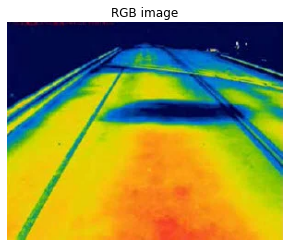

In [2]:
imgc = cv2.imread('IRimage_opencv/img2.jpg')
def imgconvert(img):
    b,g,r=cv2.split(img)
    img=cv2.merge((r,g,b))
    return img
imgc=imgconvert(imgc)
plt.imshow(imgc)
plt.axis('off')
plt.title('RGB image')

In [3]:
[m,n,h]=imgc.shape
m,n,h

(236, 299, 3)

In [4]:
imgct=imgc

In [5]:
from statistics import mode
import statistics
from scipy import stats as s

In [6]:
for j in range(h):
    jj=int(s.mode(imgc[0,:,j])[0])
    for i in range(m):
        #mean=np.mean(imgc[i,:,j])
        #var=np.var(imgc[i,:,j])
        #print(find_max_mode(imgc[i,:,j]))
        imgct[i,:,j]=imgc[i,:,j]-int(s.mode(imgc[i,:,j])[0])+jj

In [7]:
imgct[:,:,1]

array([[ 2,  0, 11, ...,  9, 10, 11],
       [ 4,  1,  9, ...,  4,  4,  6],
       [ 8,  2,  7, ...,  1,  2,  3],
       ...,
       [74, 75, 77, ..., 93, 91, 86],
       [ 1,  3,  3, ..., 19, 17, 12],
       [ 3,  3,  4, ..., 19, 17, 12]], dtype=uint8)

Text(0.5, 1.0, 'RGB image')

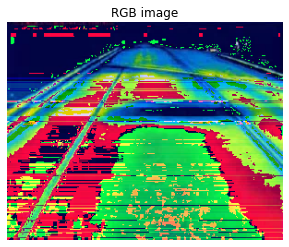

In [8]:
plt.imshow(imgc)
plt.axis('off')
plt.title('RGB image')

### by calculating the gradient of the image, we can get the gradient image

Text(0.5, 1.0, 'gray image')

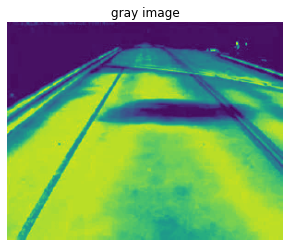

In [9]:
imgc = cv2.imread('IRimage_opencv/img2.jpg')
gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.title('gray image')

In [10]:
gradX = cv2.Sobel(imgc, ddepth=cv2.CV_32F, dx=1, dy=0)
gradY = cv2.Sobel(imgc, ddepth=cv2.CV_32F, dx=0, dy=1)

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)


Text(0.5, 1.0, 'gradient image')

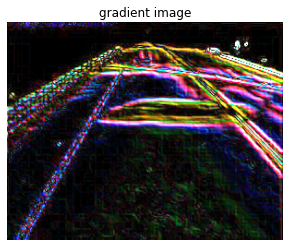

In [11]:
plt.imshow(gradient)
plt.axis('off')
plt.title('gradient image')

Text(0.5, 1.0, 'RGB image')

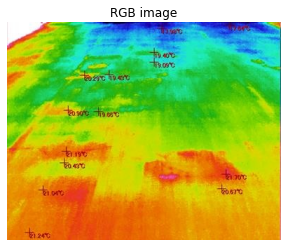

In [12]:
imgo = cv2.imread('/Users/zhangtianjie/Documents/GitHub/IR_image_process/IRimages/图片4.jpg')
# def imgconvert(img):
#     b,g,r=cv2.split(img)
#     img=cv2.merge((r,g,b))
#     return img
imgo=cv2.cvtColor(imgo,cv2.COLOR_BGR2RGB)
#imgo=imgconvert(imgo)
plt.imshow(imgo)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'gray image')

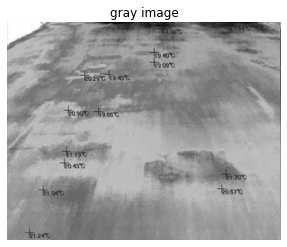

In [13]:
#imgo = cv2.imread('IRimage_opencv/img2.jpg')
img1=cv2.cvtColor(imgo,cv2.COLOR_RGB2GRAY)
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.title('gray image')

In [14]:
b=imgo[:,:,2]

In [15]:
[m,n]=b.shape
m,n

(311, 391)

In [16]:
c=np.zeros((m,n))
d=np.zeros((m,n))
e=np.zeros((m,n))
g=np.zeros((m,n))

In [17]:
for i in range(m):
    for j in range(n):
        if b[i,j]<120:
            c[i,j]=b[i,j]
        else:
            d[i,j]=b[i,j]

In [18]:
for i in range(m):
    for j in range(n):
        if c[i,j]>80:
            e[i,j]=0
        else:
            e[i,j]=c[i,j]
        if c[i,j]>90:
            g[i,j]=0
        else:
            g[i,j]=c[i,j]

In [19]:
f=imgo
f[:,:,0]=g*255
f[:,:,1]=(c-e)*255
f[:,:,2]=0


Text(0.5, 1.0, 'RGB image')

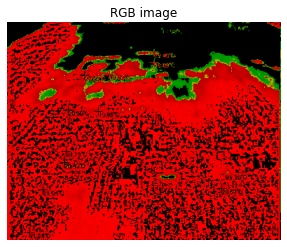

In [20]:
plt.imshow(f)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'RGB image')

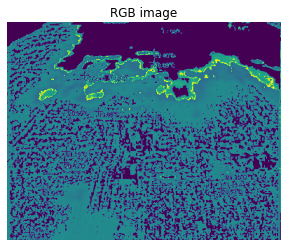

In [21]:
f1=cv2.cvtColor(f,cv2.COLOR_RGB2GRAY)
plt.imshow(f1)
plt.axis('off')
plt.title('RGB image')

In [22]:
for i in range(m):
    for j in range(n):
        if 255*f1[i,j]==0:
            continue
        else:
            img1[i,j]=0

In [23]:
# bl=f[:,:,0]
# for i in range(m):
#     for j in range(n):
#         if f[i,j,0]>0:
#             bl[i,j]=1
#         else:
#             bl[i,j]=0

Text(0.5, 1.0, 'RGB image')

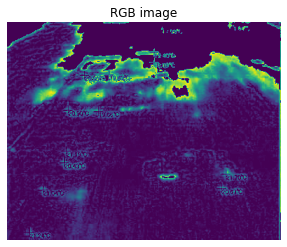

In [24]:
plt.imshow(c)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'RGB image')

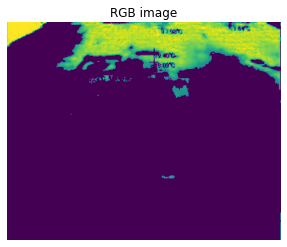

In [25]:
plt.imshow(d)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'RGB image')

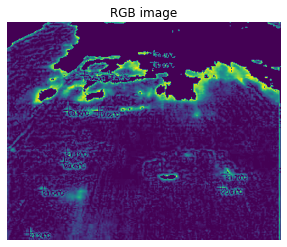

In [26]:
plt.imshow(e)
plt.axis('off')
plt.title('RGB image')

Text(0.5, 1.0, 'RGB image')

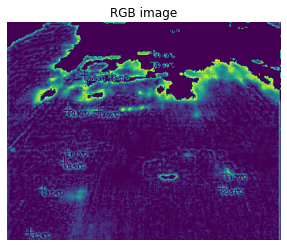

In [27]:
plt.imshow(g)
plt.axis('off')
plt.title('RGB image')

In [28]:
import math
ff=imgo
# ff[:,:,0]=img1
# ff[:,:,1]=img1
# ff[:,:,2]=img1

In [29]:
[b,v]=img1.shape
for i in range(b):
    for j in range(v):
        ff[i,j,0]=math.floor(img1[i,j])

ff[:,:,1]=ff[:,:,0]
ff[:,:,2]=ff[:,:,0]

Text(0.5, 1.0, 'RGB image')

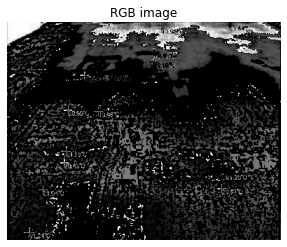

In [32]:
plt.imshow(f+ff,cmap='gray')
plt.axis('off')
plt.title('RGB image')